1. Carga del dataset y división Train/Test

In [50]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split

#Ruta y carga segura del dataset
DATA_PATH = Path("../data/processed/passwords_features_selected_zxcvbn.csv")

#Carga el dataset
df = pd.read_csv(DATA_PATH)
print(f"Dataset cargado correctamente desde: {DATA_PATH}")
print("Dimensiones:", df.shape)
display(df.head(5))

#Verificar que la columna objetivo exista
if 'target_bin_zxcvbn' not in df.columns:
    raise KeyError(" No se encontró la columna 'target_bin_zxcvbn' en el dataset.")

#Separar variables predictoras (X) y objetivo (y)
y = df['target_bin_zxcvbn'].astype(int)
X = df.drop(columns=['target_bin_zxcvbn'])

print("\nColumnas predictoras:", X.shape[1])
print(" Variable objetivo: target_bin_zxcvbn")
print("Distribución de clases:")
print(y.value_counts(normalize=True).rename({0:'Débiles', 1:'Robustas'}) * 100)

#División estratificada en Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,            # 20% del dataset para test
    stratify=y,               # mantiene la proporción de clases
    random_state=42
)

print("\n División completada.")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print(f"Proporción clase Robusta en Train: {y_train.mean():.4f}")
print(f"Proporción clase Robusta en Test : {y_test.mean():.4f}")

Dataset cargado correctamente desde: ..\data\processed\passwords_features_selected_zxcvbn.csv
Dimensiones: (2008145, 22)


,charset_size,has_year,length,num_symbols,has_common,num_upper,_ends_digit_run6,_starts_digit_run6,_has_year4,has_repeat,...,_date_at_end,_has_date6,has_seq_num,num_lower,_has_date8,_has_word_year2,_ends_inc_seq4,_has_long_repeats,_is_email_strict,target_bin_zxcvbn
0,36,1,10,0,0,0,0,0,1,0,...,0,0,0,6,0,0,0,0,0,0
1,68,0,15,1,1,0,0,0,0,0,...,0,0,1,10,0,0,1,0,0,1
2,62,0,8,0,1,1,0,0,0,0,...,0,0,0,6,0,0,0,0,0,0
3,36,0,8,0,0,0,0,0,0,1,...,0,0,0,5,0,0,0,0,0,0
4,84,0,12,2,1,3,0,0,0,0,...,0,0,0,7,0,0,0,0,0,1



Columnas predictoras: 21
 Variable objetivo: target_bin_zxcvbn
Distribución de clases:
target_bin_zxcvbn
Robustas    63.984623
Débiles     36.015377
Name: proportion, dtype: float64

 División completada.
Train: (1606516, 21), Test: (401629, 21)
Proporción clase Robusta en Train: 0.6398
Proporción clase Robusta en Test : 0.6398


2. Escalado y preprocesamiento

In [16]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Verificamos qué tipo de variables tenemos
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
print(f"Total de columnas numéricas: {len(numeric_cols)}")

#Aplicamos escalado solo a modelos lineales
# Usaremos StandardScaler (media=0, var=1), pero se podría usar MinMaxScaler (0–1)
scaler = StandardScaler()

# Ajustamos en el conjunto de entrenamiento y transformamos ambos
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

# Convertimos de nuevo a DataFrame manteniendo nombres de columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_cols, index=X_test.index)

print("Escalado aplicado correctamente a las variables numéricas.")
print("Dimensiones del conjunto escalado:", X_train_scaled.shape)

# Preparación final de los datos para modelado
X_train_prepared = X_train_scaled.copy()
X_test_prepared = X_test_scaled.copy()

# Validación rápida
display(X_train_prepared.head())


Total de columnas numéricas: 21
Escalado aplicado correctamente a las variables numéricas.
Dimensiones del conjunto escalado: (1606516, 21)


,charset_size,has_year,length,num_symbols,has_common,num_upper,_ends_digit_run6,_starts_digit_run6,_has_year4,has_repeat,...,_max_same_char_run,_date_at_end,_has_date6,has_seq_num,num_lower,_has_date8,_has_word_year2,_ends_inc_seq4,_has_long_repeats,_is_email_strict
1698445,0.659774,-0.518173,0.073269,0.708235,-0.435896,0.989576,-0.417116,-0.383156,-0.358135,-0.372208,...,-0.629646,-0.192658,-0.272673,-0.18259,-0.442929,-0.14307,-0.206689,-0.122875,-0.079032,-0.032103
604190,-0.868680,-0.518173,-0.399789,-0.932722,2.294123,-0.908587,-0.417116,-0.383156,-0.358135,-0.372208,...,-0.629646,-0.192658,-0.272673,-0.18259,2.040443,-0.14307,-0.206689,-0.122875,-0.079032,-0.032103
1131056,0.978202,-0.518173,1.255916,0.708235,-0.435896,1.369209,-0.417116,-0.383156,-0.358135,-0.372208,...,-0.629646,-0.192658,-0.272673,-0.18259,-0.088162,-0.14307,-0.206689,-0.122875,-0.079032,-0.032103
1267684,0.659774,-0.518173,-0.163260,0.708235,-0.435896,0.609944,-0.417116,-0.383156,-0.358135,-0.372208,...,-0.629646,-0.192658,-0.272673,-0.18259,-0.442929,-0.14307,-0.206689,-0.122875,-0.079032,-0.032103
1349150,0.978202,-0.518173,-0.163260,0.708235,-0.435896,0.989576,-0.417116,-0.383156,-0.358135,-0.372208,...,-0.629646,-0.192658,-0.272673,-0.18259,-1.152464,-0.14307,-0.206689,-0.122875,-0.079032,-0.032103


3. Modelos base — Regresión Logística y Árbol de Decisión

=== Regresión Logística ===
              precision    recall  f1-score   support

           0     0.8617    0.9565    0.9066    144648
           1     0.9739    0.9136    0.9428    256981

    accuracy                         0.9290    401629
   macro avg     0.9178    0.9350    0.9247    401629
weighted avg     0.9335    0.9290    0.9297    401629

F1 (clase robusta=1): 0.9428
Balanced Accuracy: 0.935
ROC-AUC: 0.9861


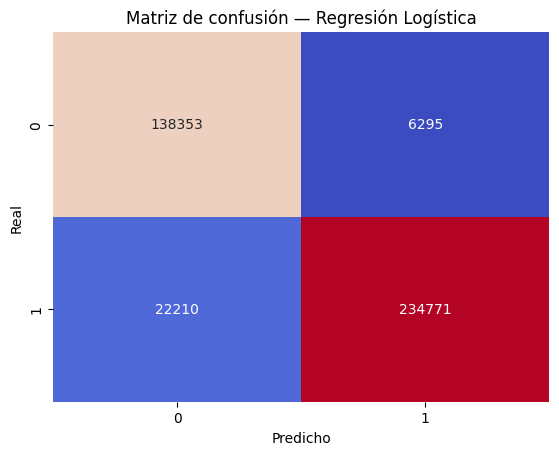

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, f1_score, balanced_accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns

#REGRESIÓN LOGÍSTICA — Modelo base lineal
log_reg = LogisticRegression(
    max_iter=200,
    class_weight='balanced',  # compensa clases desbalanceadas
    random_state=42
)

# Entrenamiento con datos escalados
log_reg.fit(X_train_prepared, y_train)

# Predicción
y_pred_lr = log_reg.predict(X_test_prepared)
y_proba_lr = log_reg.predict_proba(X_test_prepared)[:, 1]

# Evaluación
print("=== Regresión Logística ===")
print(classification_report(y_test, y_pred_lr, digits=4))
print("F1 (clase robusta=1):", round(f1_score(y_test, y_pred_lr, pos_label=1), 4))
print("Balanced Accuracy:", round(balanced_accuracy_score(y_test, y_pred_lr), 4))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_lr), 4))

# Matriz de confusión
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Matriz de confusión — Regresión Logística")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


=== Árbol de Decisión ===
              precision    recall  f1-score   support

           0     0.8819    0.9639    0.9211    144648
           1     0.9785    0.9273    0.9523    256981

    accuracy                         0.9405    401629
   macro avg     0.9302    0.9456    0.9367    401629
weighted avg     0.9437    0.9405    0.9410    401629

F1 (clase robusta=1): 0.9523
Balanced Accuracy: 0.9456
ROC-AUC: 0.9893


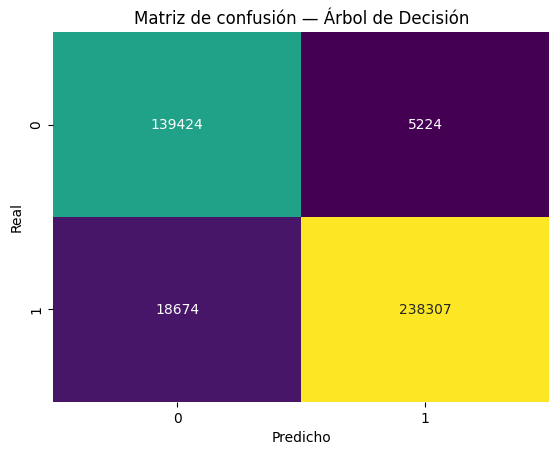

In [ ]:
#ÁRBOL DE DECISIÓN (modelo no lineal)
tree = DecisionTreeClassifier(
    max_depth=None,              # sin límite de profundidad
    min_samples_split=2,         # división mínima
    class_weight='balanced',     # balancea las clases
    random_state=42
)

# Entrenamiento con datos SIN escalar (X_train)
tree.fit(X_train, y_train)

# Predicción
y_pred_tree = tree.predict(X_test)
y_proba_tree = tree.predict_proba(X_test)[:, 1]

# Evaluación
print("=== Árbol de Decisión ===")
print(classification_report(y_test, y_pred_tree, digits=4))
print("F1 (clase robusta=1):", round(f1_score(y_test, y_pred_tree, pos_label=1), 4))
print("Balanced Accuracy:", round(balanced_accuracy_score(y_test, y_pred_tree), 4))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_tree), 4))

# Matriz de confusión
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.title("Matriz de confusión — Árbol de Decisión")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


In [19]:
# Cross-Validation (StratifiedKFold) para modelos base

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Scorers
scoring = {
    'roc_auc': 'roc_auc',
    'f1_weak': make_scorer(f1_score, pos_label=1),
    'bal_acc': 'balanced_accuracy'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 1) Regresión Logística en pipeline con escalado
logreg_cv = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=200, class_weight='balanced', random_state=42))
])

res_lr = cross_validate(
    logreg_cv, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False
)

print("=== CV — Regresión Logística (5-fold) ===")
print(f"ROC-AUC : {res_lr['test_roc_auc'].mean():.4f} ± {res_lr['test_roc_auc'].std():.4f}")
print(f"F1 robusta: {res_lr['test_f1_weak'].mean():.4f} ± {res_lr['test_f1_weak'].std():.4f}")
print(f"Bal.Acc.: {res_lr['test_bal_acc'].mean():.4f} ± {res_lr['test_bal_acc'].std():.4f}")

# 2) Árbol de Decisión sin escalado
tree_cv = DecisionTreeClassifier(class_weight='balanced', random_state=42)

res_tree = cross_validate(
    tree_cv, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False
)

print("\n=== CV — Árbol de Decisión (5-fold) ===")
print(f"ROC-AUC : {res_tree['test_roc_auc'].mean():.4f} ± {res_tree['test_roc_auc'].std():.4f}")
print(f"F1 robusta: {res_tree['test_f1_weak'].mean():.4f} ± {res_tree['test_f1_weak'].std():.4f}")
print(f"Bal.Acc.: {res_tree['test_bal_acc'].mean():.4f} ± {res_tree['test_bal_acc'].std():.4f}")


=== CV — Regresión Logística (5-fold) ===
ROC-AUC : 0.9860 ± 0.0001
F1 robusta: 0.9425 ± 0.0002
Bal.Acc.: 0.9349 ± 0.0003

=== CV — Árbol de Decisión (5-fold) ===
ROC-AUC : 0.9893 ± 0.0001
F1 robusta: 0.9519 ± 0.0002
Bal.Acc.: 0.9455 ± 0.0002


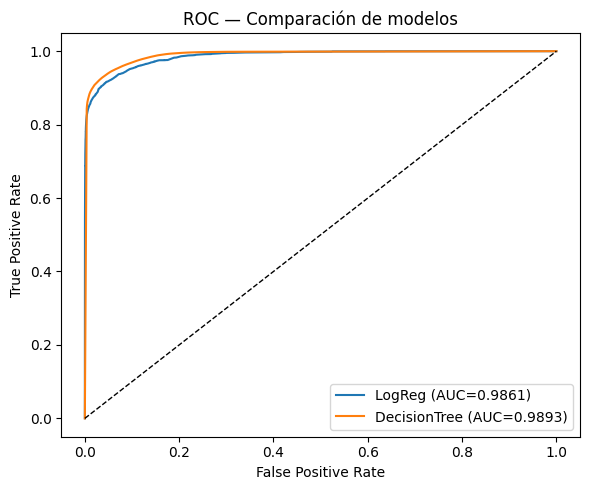

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_tr, tpr_tr, _ = roc_curve(y_test, y_proba_tree)

auc_lr = roc_auc_score(y_test, y_proba_lr)
auc_tr = roc_auc_score(y_test, y_proba_tree)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC={auc_lr:.4f})")
plt.plot(fpr_tr, tpr_tr, label=f"DecisionTree (AUC={auc_tr:.4f})")
plt.plot([0,1],[0,1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC — Comparación de modelos")
plt.legend()
plt.tight_layout()
plt.show()


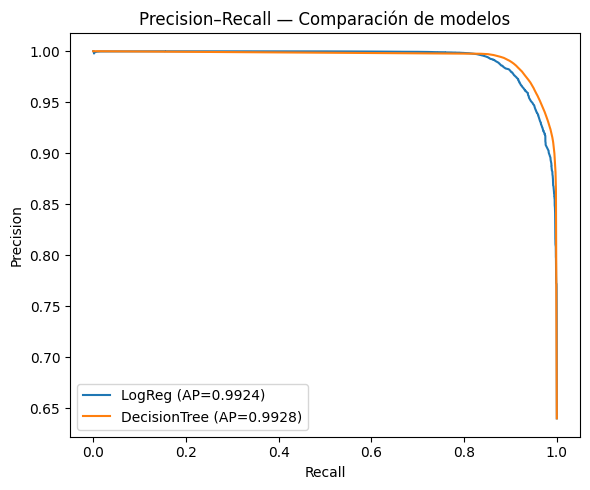

In [21]:
from sklearn.metrics import precision_recall_curve, average_precision_score

p_lr, r_lr, _ = precision_recall_curve(y_test, y_proba_lr)
p_tr, r_tr, _ = precision_recall_curve(y_test, y_proba_tree)

ap_lr = average_precision_score(y_test, y_proba_lr)
ap_tr = average_precision_score(y_test, y_proba_tree)

plt.figure(figsize=(6,5))
plt.plot(r_lr, p_lr, label=f"LogReg (AP={ap_lr:.4f})")
plt.plot(r_tr, p_tr, label=f"DecisionTree (AP={ap_tr:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall — Comparación de modelos")
plt.legend()
plt.tight_layout()
plt.show()


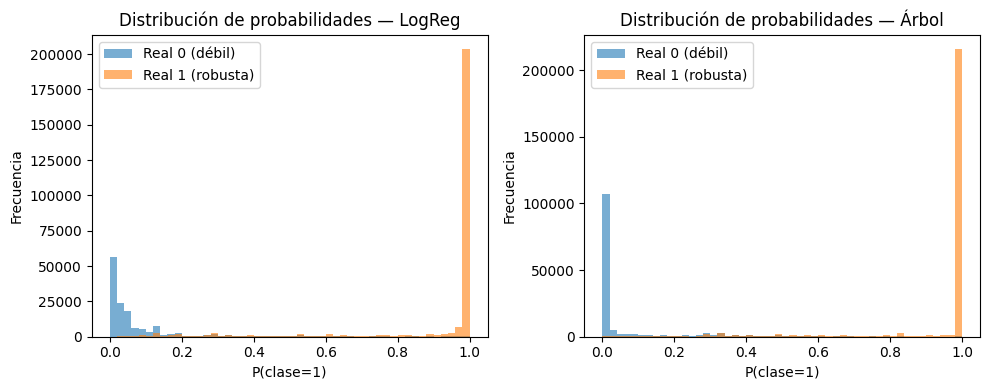

In [22]:
import numpy as np

plt.figure(figsize=(10,4))

# LogReg
plt.subplot(1,2,1)
plt.hist(y_proba_lr[y_test==0], bins=50, alpha=0.6, label='Real 0 (débil)')
plt.hist(y_proba_lr[y_test==1], bins=50, alpha=0.6, label='Real 1 (robusta)')
plt.title("Distribución de probabilidades — LogReg")
plt.xlabel("P(clase=1)")
plt.ylabel("Frecuencia")
plt.legend()

# Árbol
plt.subplot(1,2,2)
plt.hist(y_proba_tree[y_test==0], bins=50, alpha=0.6, label='Real 0 (débil)')
plt.hist(y_proba_tree[y_test==1], bins=50, alpha=0.6, label='Real 1 (robusta)')
plt.title("Distribución de probabilidades — Árbol")
plt.xlabel("P(clase=1)")
plt.ylabel("Frecuencia")
plt.legend()

plt.tight_layout()
plt.show()


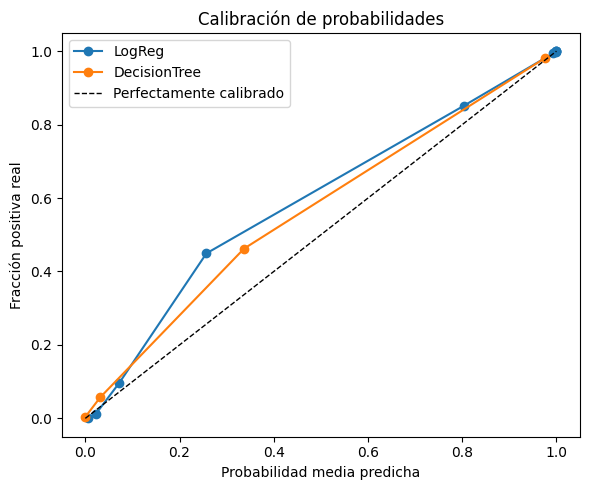

In [23]:
from sklearn.calibration import calibration_curve

def plot_calibration(y_true, y_proba, label):
    frac_pos, mean_pred = calibration_curve(y_true, y_proba, n_bins=10, strategy='quantile')
    plt.plot(mean_pred, frac_pos, marker='o', label=label)

plt.figure(figsize=(6,5))
plot_calibration(y_test, y_proba_lr,   "LogReg")
plot_calibration(y_test, y_proba_tree, "DecisionTree")
plt.plot([0,1],[0,1], 'k--', linewidth=1, label='Perfectamente calibrado')
plt.xlabel("Probabilidad media predicha")
plt.ylabel("Fracción positiva real")
plt.title("Calibración de probabilidades")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\joxue\AppData\Local\Temp\ipykernel_5512\2673118116.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


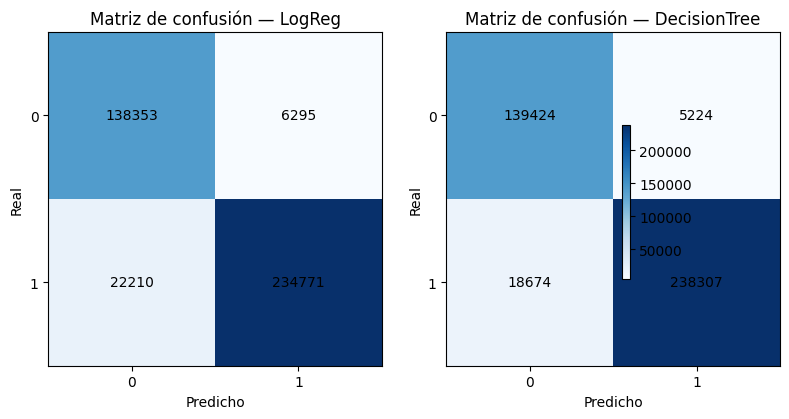

In [24]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_tr = confusion_matrix(y_test, y_pred_tree)

fig, axes = plt.subplots(1,2, figsize=(8,4))
for ax, cm, name in zip(axes, [cm_lr, cm_tr], ["LogReg","DecisionTree"]):
    im = ax.imshow(cm, cmap='Blues')
    for (i,j), v in np.ndenumerate(cm):
        ax.text(j, i, int(v), ha='center', va='center')
    ax.set_title(f"Matriz de confusión — {name}")
    ax.set_xlabel("Predicho"); ax.set_ylabel("Real")
    ax.set_xticks([0,1]); ax.set_yticks([0,1])
fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.5)
plt.tight_layout()
plt.show()


In [ ]:
suspect = [
    '_pattern_count', 'has_common', 'has_seq_num', 'has_year',
    '_has_year4', '_has_date6', '_has_date8', '_has_word_year2',
    '_starts_digit_run6', '_ends_digit_run6', '_ends_inc_seq4',
    'charset_size','num_symbols',
    '_has_long_repeats', '_max_same_char_run', '_date_at_end'
]


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

X_base = df.drop(columns=['target_bin_zxcvbn'])
y = df['target_bin_zxcvbn'].astype(int)

def cv_report(X_use, y):
    pipe = Pipeline([('scaler', StandardScaler()),
                     ('clf', LogisticRegression(max_iter=200, class_weight='balanced', random_state=42))])
    scoring = {'roc_auc':'roc_auc','f1_weak':make_scorer(f1_score, pos_label=1),'bal_acc':'balanced_accuracy'}
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    res = cross_validate(pipe, X_use, y, cv=cv, scoring=scoring, n_jobs=-1)
    print("ROC-AUC:", res['test_roc_auc'].mean(), "F1:", res['test_f1_weak'].mean(), "BalAcc:", res['test_bal_acc'].mean())

print("Baseline (todas las features):")
cv_report(X_base, y)

print("\nAblation (sin sospechosas):")
X_drop = X_base.drop(columns=[c for c in suspect if c in X_base.columns])
cv_report(X_drop, y)


Baseline (todas las features):
ROC-AUC: 0.9860314604600809 F1: 0.9424914104273394 BalAcc: 0.9348686782145705

Ablation (sin sospechosas):
ROC-AUC: 0.9837428788690257 F1: 0.9325787973119593 BalAcc: 0.9257537582685103


In [27]:
from sklearn.model_selection import GroupKFold, cross_validate

# Define columnas de patrón/semántica para formar el "grupo"
pattern_cols = [c for c in X_base.columns if c.startswith(('_has_', '_ends_', '_starts_', 'has_'))]

# Grupo = hash del patrón binario (concatenación de 0/1)
groups = (df[pattern_cols].astype(int).astype(str).agg(''.join, axis=1)).astype('category').cat.codes

pipe = Pipeline([('scaler', StandardScaler()),
                 ('clf', LogisticRegression(max_iter=200, class_weight='balanced', random_state=42))])

scoring = {'roc_auc':'roc_auc','f1_weak':make_scorer(f1_score, pos_label=1),'bal_acc':'balanced_accuracy'}
gcv = GroupKFold(n_splits=5)

res = cross_validate(pipe, X_base, y, cv=gcv.split(X_base, y, groups=groups), scoring=scoring, n_jobs=-1)
print("GroupKFold — ROC-AUC:", res['test_roc_auc'].mean(), "F1:", res['test_f1_weak'].mean(), "BalAcc:", res['test_bal_acc'].mean())


GroupKFold — ROC-AUC: 0.9394234249192872 F1: 0.7547948583311601 BalAcc: 0.792024388599503


3.1 Modelos Base con regularizacion 

In [28]:
# Regresión Logística con regularización (L1 y L2)


import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, classification_report, make_scorer

# Scorers y CV
scoring = {
    'roc_auc': 'roc_auc',
    'f1_weak': make_scorer(f1_score, pos_label=1),
    'bal_acc': 'balanced_accuracy'
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Modelos regularizados
logreg_L2 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        penalty='l2', solver='lbfgs', C=0.2,  # L2 (Ridge) con regularización moderada
        class_weight='balanced', max_iter=400, random_state=42
    ))
])


logreg_L1 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        penalty='l1', solver='liblinear', C=0.04,  # L1 (Lasso) más agresiva (sparse)
        class_weight='balanced', max_iter=400, random_state=42
    ))
])

def eval_pipe(name, pipe):
    pipe.fit(X_train, y_train)
    y_pred  = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]
    print(f"\n=== {name} — Test ===")
    print(classification_report(y_test, y_pred, digits=4))
    print("F1 (Robusta=1):", round(f1_score(y_test, y_pred, pos_label=1), 4))
    print("Balanced Acc.:", round(balanced_accuracy_score(y_test, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 4))
    res = cross_validate(pipe, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    print(f"CV-ROC_AUC: {res['test_roc_auc'].mean():.4f} ± {res['test_roc_auc'].std():.4f}")
    print(f"CV-F1     : {res['test_f1_weak'].mean():.4f} ± {res['test_f1_weak'].std():.4f}")
    print(f"CV-BalAcc : {res['test_bal_acc'].mean():.4f} ± {res['test_bal_acc'].std():.4f}")
    return res

res_L2 = eval_pipe("LogReg L2 (C=0.2)", logreg_L2)
res_L1 = eval_pipe("LogReg L1 (C=0.04)", logreg_L1)



=== LogReg L2 (C=0.5) — Test ===
              precision    recall  f1-score   support

           0     0.8608    0.9571    0.9064    144648
           1     0.9742    0.9129    0.9426    256981

    accuracy                         0.9288    401629
   macro avg     0.9175    0.9350    0.9245    401629
weighted avg     0.9334    0.9288    0.9295    401629

F1 (Robusta=1): 0.9426
Balanced Acc.: 0.935
ROC-AUC: 0.9861
CV-ROC_AUC: 0.9860 ± 0.0001
CV-F1     : 0.9422 ± 0.0002
CV-BalAcc : 0.9348 ± 0.0003

=== LogReg L1 (C=0.04) — Test ===
              precision    recall  f1-score   support

           0     0.8609    0.9571    0.9064    144648
           1     0.9742    0.9129    0.9426    256981

    accuracy                         0.9288    401629
   macro avg     0.9175    0.9350    0.9245    401629
weighted avg     0.9334    0.9288    0.9296    401629

F1 (Robusta=1): 0.9426
Balanced Acc.: 0.935
ROC-AUC: 0.9861
CV-ROC_AUC: 0.9860 ± 0.0001
CV-F1     : 0.9422 ± 0.0001
CV-BalAcc : 0.934

In [29]:
 # Coeficientes distintos de cero (qué features sobreviven a L1)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler().fit(X_train)
Xtr = scaler.transform(X_train)
Xte = scaler.transform(X_test)

lr_l1 = LogisticRegression(
    penalty='l1', solver='liblinear', C=0.04,
    class_weight='balanced', max_iter=400, random_state=42
).fit(Xtr, y_train)

coef_series = pd.Series(lr_l1.coef_.ravel(), index=X.columns)
coef_nz = coef_series[coef_series != 0].sort_values(key=np.abs, ascending=False)
print("Coeficientes no-cero (L1):")
display(coef_nz)


Coeficientes no-cero (L1):


length                9.761478
num_lower            -3.675955
num_digits           -3.355329
num_upper            -3.313479
num_symbols          -2.257865
has_year             -0.588051
has_common           -0.578494
charset_size          0.380633
_max_same_char_run   -0.380012
has_seq_num          -0.378513
_has_date8           -0.249272
_has_long_repeats    -0.247758
_date_at_end         -0.193848
_starts_digit_run6    0.168606
_ends_inc_seq4       -0.140866
has_repeat            0.116720
_ends_digit_run6      0.116652
_has_year4            0.089976
_has_word_year2       0.044244
_is_email_strict      0.015870
_has_date6           -0.014101
dtype: float64

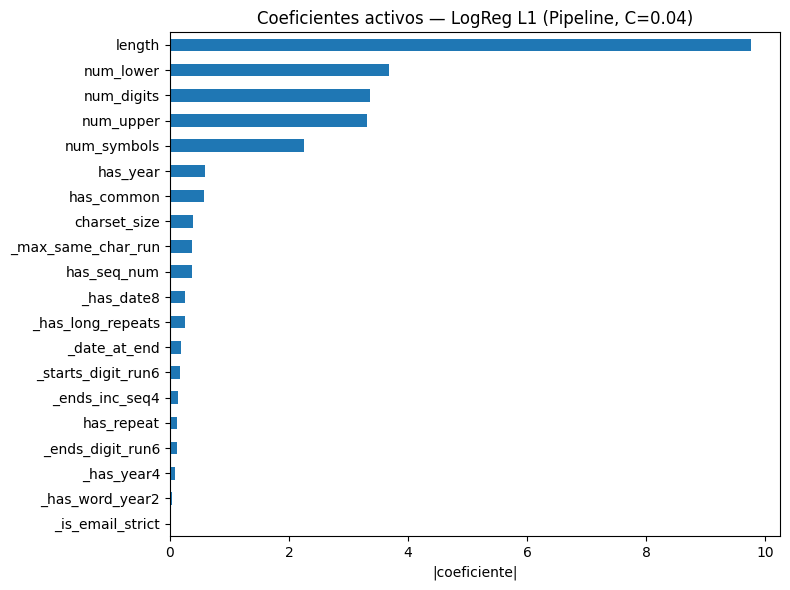

In [30]:

scaler = logreg_L1.named_steps['scaler']
clf    = logreg_L1.named_steps['clf']  # LogisticRegression

# Coeficientes en el espacio ESCALADO (mismo resultado que en A si escalas antes de entrenar)
coef_scaled = pd.Series(clf.coef_.ravel(), index=X.columns)

# Transformar coeficientes al ESPACIO ORIGINAL de las features:
beta_scaled = clf.coef_.ravel()
scale = scaler.scale_
mean  = scaler.mean_

beta_orig = beta_scaled / scale
intercept_orig = clf.intercept_[0] - (beta_scaled * mean / scale).sum()

coef_orig = pd.Series(beta_orig, index=X.columns)

# Elige cuál graficar: coef_scaled o coef_orig
coefs_nz = coef_scaled[coef_scaled != 0].sort_values(key=np.abs, ascending=False)

plt.figure(figsize=(8,6))
(coefs_nz.abs().head(20)[::-1]).plot(kind='barh')
plt.title("Coeficientes activos — LogReg L1 (Pipeline, C=0.04)")
plt.xlabel("|coeficiente|")
plt.tight_layout()
plt.show()


In [31]:
# Árbol de Decisión con simplificación (limitación + poda)

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, classification_report, make_scorer

# Modelo baseline simple (para referencia)
tree_base = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42
)

# Modelo regularizado/simplificado
tree_reg = DecisionTreeClassifier(
    max_depth=6,              # árbol más somero
    min_samples_split=100,    # requiere más muestras para dividir
    min_samples_leaf=50,      # hojas más grandes (más generalización)
    min_impurity_decrease=0.001,  # exige ganancia mínima
    ccp_alpha=0.002,          # poda ligera adicional
    class_weight='balanced',
    random_state=42
)

def eval_tree(name, clf):
    clf.fit(X_train, y_train)
    y_pred  = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]
    print(f"\n=== {name} — Test ===")
    print(classification_report(y_test, y_pred, digits=4))
    print("F1 (Robusta=1):", round(f1_score(y_test, y_pred, pos_label=1), 4))
    print("Balanced Acc.:", round(balanced_accuracy_score(y_test, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 4))
    res = cross_validate(clf, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                         scoring={'roc_auc':'roc_auc','f1_weak':make_scorer(f1_score, pos_label=1),'bal_acc':'balanced_accuracy'},
                         n_jobs=-1)
    print(f"CV-ROC_AUC: {res['test_roc_auc'].mean():.4f} ± {res['test_roc_auc'].std():.4f}")
    print(f"CV-F1     : {res['test_f1_weak'].mean():.4f} ± {res['test_f1_weak'].std():.4f}")
    print(f"CV-BalAcc : {res['test_bal_acc'].mean():.4f} ± {res['test_bal_acc'].std():.4f}")
    return res

res_tree_base = eval_tree("DecisionTree BASE", tree_base)
res_tree_reg  = eval_tree("DecisionTree REG (profundidad+poda)", tree_reg)


=== DecisionTree BASE — Test ===
              precision    recall  f1-score   support

           0     0.8819    0.9639    0.9211    144648
           1     0.9785    0.9273    0.9523    256981

    accuracy                         0.9405    401629
   macro avg     0.9302    0.9456    0.9367    401629
weighted avg     0.9437    0.9405    0.9410    401629

F1 (Robusta=1): 0.9523
Balanced Acc.: 0.9456
ROC-AUC: 0.9893
CV-ROC_AUC: 0.9893 ± 0.0001
CV-F1     : 0.9519 ± 0.0002
CV-BalAcc : 0.9455 ± 0.0002

=== DecisionTree REG (profundidad+poda) — Test ===
              precision    recall  f1-score   support

           0     0.8707    0.9301    0.8994    144648
           1     0.9591    0.9223    0.9403    256981

    accuracy                         0.9251    401629
   macro avg     0.9149    0.9262    0.9199    401629
weighted avg     0.9272    0.9251    0.9256    401629

F1 (Robusta=1): 0.9403
Balanced Acc.: 0.9262
ROC-AUC: 0.9753
CV-ROC_AUC: 0.9749 ± 0.0002
CV-F1     : 0.9398 ± 0.000

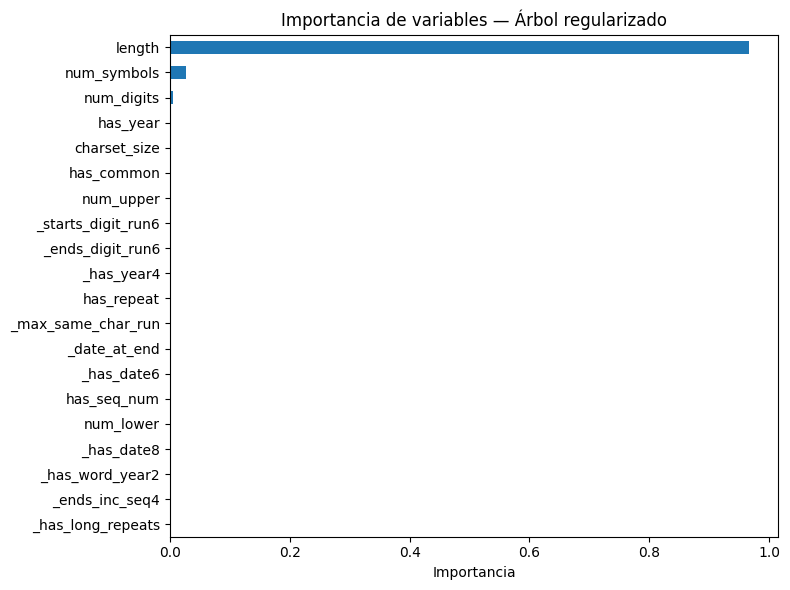

Profundidad del árbol: 3
Número de hojas: 5


In [32]:

importances = pd.Series(tree_reg.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
importances.head(20)[::-1].plot(kind='barh')
plt.title("Importancia de variables — Árbol regularizado")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

print("Profundidad del árbol:", tree_reg.get_depth())
print("Número de hojas:", tree_reg.get_n_leaves())


3.2 Entrenamiento y Evaluacion sin las variables 'charset_size','num_symbols', 'num_upper','length'


In [ ]:
#Entrenamiento sin variables Dominantes

X_no_charset = X.drop(columns=['charset_size','num_symbols', 'num_upper','length'])
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(
    X_no_charset, y, test_size=0.2, stratify=y, random_state=42
)



=== Árbol regularizado SIN 'charset_size' ===
              precision    recall  f1-score   support

           0     0.8289    0.9366    0.8794    144648
           1     0.9615    0.8912    0.9250    256981

    accuracy                         0.9075    401629
   macro avg     0.8952    0.9139    0.9022    401629
weighted avg     0.9137    0.9075    0.9086    401629

F1 (robusta=1): 0.925
Balanced Acc.: 0.9139
ROC-AUC: 0.9619
CV-ROC_AUC 0.9618877513669499
CV-ROC_AUC: 0.9618 ± 0.0001
CV-F1     : 0.9247 ± 0.0001
CV-BalAcc : 0.9137 ± 0.0001


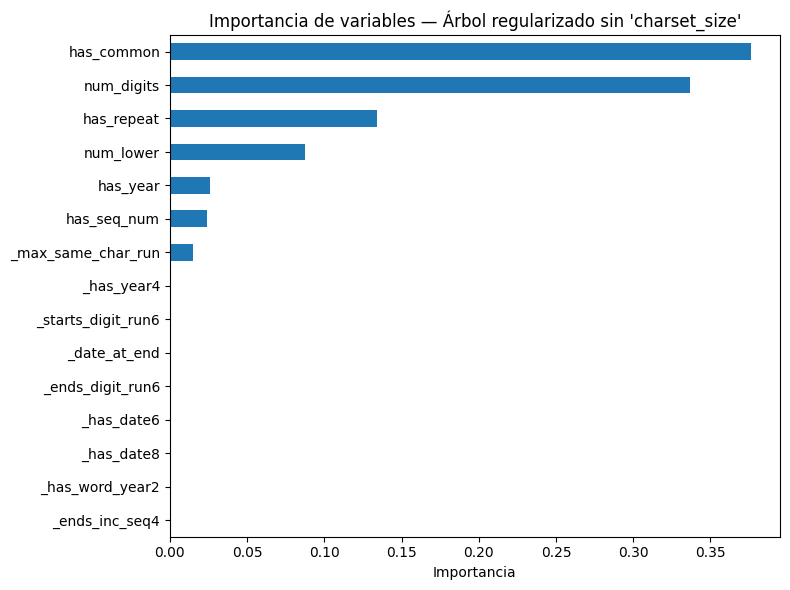

In [54]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, classification_report

# Usaremos el árbol regularizado como referencia
tree_no_charset = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=50,
    min_samples_leaf=25,
    ccp_alpha=0.001,
    class_weight='balanced',
    random_state=42
)

tree_no_charset.fit(X_train_nc, y_train_nc)
y_pred_nc = tree_no_charset.predict(X_test_nc)
y_proba_nc = tree_no_charset.predict_proba(X_test_nc)[:, 1]

print("\n=== Árbol regularizado SIN 'charset_size' ===")
print(classification_report(y_test_nc, y_pred_nc, digits=4))
print("F1 (robusta=1):", round(f1_score(y_test_nc, y_pred_nc, pos_label=1), 4))
print("Balanced Acc.:", round(balanced_accuracy_score(y_test_nc, y_pred_nc), 4))
print("ROC-AUC:", round(roc_auc_score(y_test_nc, y_proba_nc), 4))
print("CV-ROC_AUC", roc_auc_score(y_test_nc, y_proba_nc))

scoring = {
    'roc_auc': 'roc_auc',
    'f1_weak': make_scorer(f1_score, pos_label=1),
    'bal_acc': 'balanced_accuracy'
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

res_cv = cross_validate(tree_no_charset, X_nc, y, cv=cv, scoring=scoring, n_jobs=-1)
print(f"CV-ROC_AUC: {res_cv['test_roc_auc'].mean():.4f} ± {res_cv['test_roc_auc'].std():.4f}")
print(f"CV-F1     : {res_cv['test_f1_weak'].mean():.4f} ± {res_cv['test_f1_weak'].std():.4f}")
print(f"CV-BalAcc : {res_cv['test_bal_acc'].mean():.4f} ± {res_cv['test_bal_acc'].std():.4f}")

# === Importancias (usar las columnas EXACTAS con las que entrenamos) ===
importances_nc = pd.Series(tree_no_charset.feature_importances_, index=X_no_charset.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
importances_nc.head(15)[::-1].plot(kind='barh')
plt.title("Importancia de variables — Árbol regularizado sin 'charset_size'")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()



=== LogReg L2 (C=0.2) — Test (sin ['charset_size', 'num_symbols', 'num_upper', 'length']) ===
              precision    recall  f1-score   support

           0     0.7933    0.9615    0.8693    144648
           1     0.9754    0.8590    0.9135    256981

    accuracy                         0.8959    401629
   macro avg     0.8843    0.9102    0.8914    401629
weighted avg     0.9098    0.8959    0.8976    401629

F1 (Robusta=1): 0.9135
Balanced Acc.: 0.9102
ROC-AUC: 0.9527
CV-ROC_AUC: 0.9528 ± 0.0002
CV-F1     : 0.9130 ± 0.0002
CV-BalAcc : 0.9099 ± 0.0002

=== LogReg L1 (C=0.04) — Test (sin ['charset_size', 'num_symbols', 'num_upper', 'length']) ===
              precision    recall  f1-score   support

           0     0.7932    0.9617    0.8694    144648
           1     0.9755    0.8589    0.9135    256981

    accuracy                         0.8959    401629
   macro avg     0.8844    0.9103    0.8915    401629
weighted avg     0.9099    0.8959    0.8976    401629

F1 (Robust

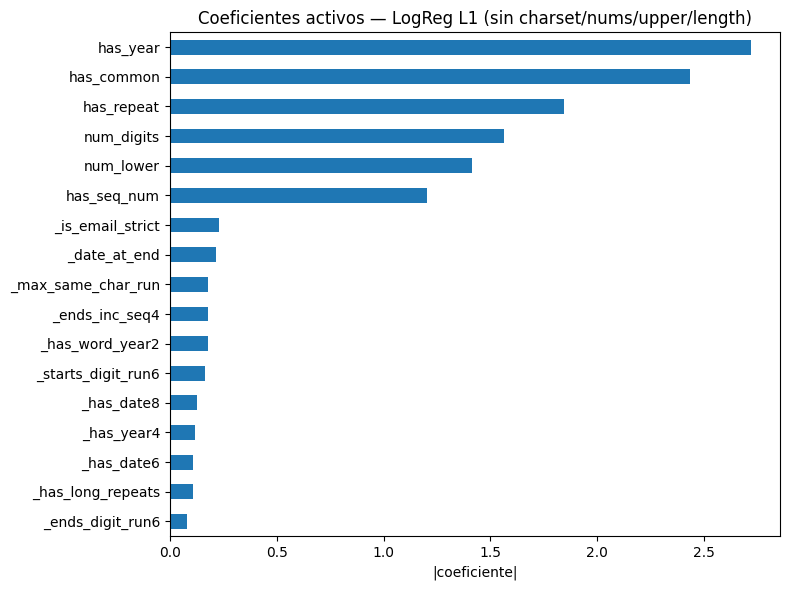

In [35]:
# === 1) Construcción del dataset SIN columnas fuertes ===
drop_cols = ['charset_size','num_symbols','num_upper','length']
X_no_charset = X.drop(columns=drop_cols)

X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(
    X_no_charset, y, test_size=0.2, stratify=y, random_state=42
)

# === 2) Modelos (idénticos a los tuyos, solo cambio de nombres) ===
logreg_L2_nc = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        penalty='l2', solver='lbfgs', C=0.2,
        class_weight='balanced', max_iter=400, random_state=42
    ))
])

logreg_L1_nc = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        penalty='l1', solver='liblinear', C=0.04,
        class_weight='balanced', max_iter=400, random_state=42
    ))
])

# === 3) Evaluador que usa SIEMPRE los sets _nc ===
def eval_pipe_nc(name, pipe):
    # Entrena con TRAIN_nc
    pipe.fit(X_train_nc, y_train_nc)
    # Predice con TEST_nc
    y_pred  = pipe.predict(X_test_nc)
    y_proba = pipe.predict_proba(X_test_nc)[:, 1]

    print(f"\n=== {name} — Test (sin {drop_cols}) ===")
    print(classification_report(y_test_nc, y_pred, digits=4))
    print("F1 (Robusta=1):", round(f1_score(y_test_nc, y_pred, pos_label=1), 4))
    print("Balanced Acc.:", round(balanced_accuracy_score(y_test_nc, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(y_test_nc, y_proba), 4))

    # CV sobre TODO el conjunto SIN esas columnas
    res = cross_validate(
        pipe, X_no_charset, y,
        cv=cv, scoring=scoring, n_jobs=-1
    )
    print(f"CV-ROC_AUC: {res['test_roc_auc'].mean():.4f} ± {res['test_roc_auc'].std():.4f}")
    print(f"CV-F1     : {res['test_f1_weak'].mean():.4f} ± {res['test_f1_weak'].std():.4f}")
    print(f"CV-BalAcc : {res['test_bal_acc'].mean():.4f} ± {res['test_bal_acc'].std():.4f}")
    return res

# === 4) Ejecutar ===
res_L2_nc = eval_pipe_nc("LogReg L2 (C=0.2)",  logreg_L2_nc)
res_L1_nc = eval_pipe_nc("LogReg L1 (C=0.04)", logreg_L1_nc)


# Tras fit de logreg_L1_nc
clf_nc = logreg_L1_nc.named_steps['clf']
coef_nc = pd.Series(clf_nc.coef_.ravel(), index=X_no_charset.columns)
coefs_nz_nc = coef_nc[coef_nc != 0].sort_values(key=np.abs, ascending=False)

plt.figure(figsize=(8,6))
(coefs_nz_nc.abs().head(20)[::-1]).plot(kind='barh')
plt.title("Coeficientes activos — LogReg L1 (sin charset/nums/upper/length)")
plt.xlabel("|coeficiente|")
plt.tight_layout()
plt.show()


4. Modelos de Ensamble 


=== RandomForest BASE — Test ===
              precision    recall  f1-score   support

           0     0.8684    0.9689    0.9159    144648
           1     0.9813    0.9174    0.9482    256981

    accuracy                         0.9359    401629
   macro avg     0.9249    0.9431    0.9321    401629
weighted avg     0.9406    0.9359    0.9366    401629

F1 (Robusta=1): 0.9482
Balanced Acc.: 0.9431
ROC-AUC: 0.9906
CV-ROC_AUC: 0.9905 ± 0.0000
CV-F1     : 0.9472 ± 0.0002
CV-BalAcc : 0.9424 ± 0.0002


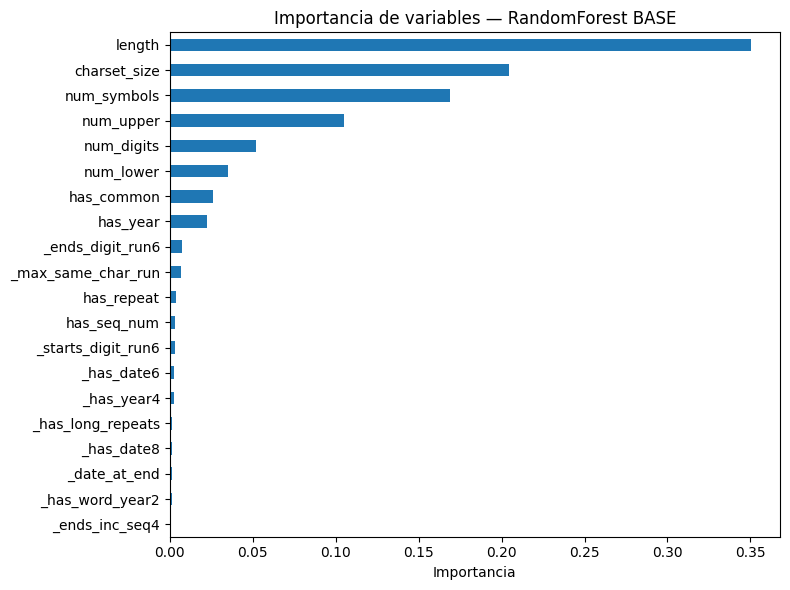


=== RandomForest ESTRICTO — Test ===
              precision    recall  f1-score   support

           0     0.8629    0.9648    0.9110    144648
           1     0.9788    0.9137    0.9451    256981

    accuracy                         0.9321    401629
   macro avg     0.9209    0.9393    0.9281    401629
weighted avg     0.9371    0.9321    0.9329    401629

F1 (Robusta=1): 0.9451
Balanced Acc.: 0.9393
ROC-AUC: 0.9896
CV-ROC_AUC: 0.9895 ± 0.0000
CV-F1     : 0.9444 ± 0.0005
CV-BalAcc : 0.9388 ± 0.0003


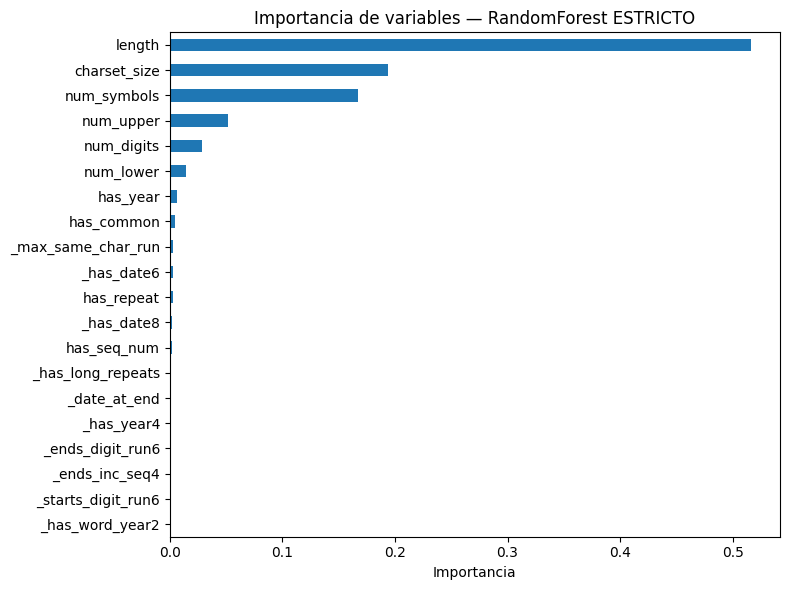

In [44]:
# 4.1 Random Forest — baseline y versión más estricta

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, f1_score, balanced_accuracy_score, roc_auc_score, make_scorer
import pandas as pd
import matplotlib.pyplot as plt


rf_base = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    min_samples_leaf=25,
    max_features='sqrt',        # ayuda a repartir importancias
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

rf_strict = RandomForestClassifier(
    n_estimators=300,           # más árboles, profundidad menor
    max_depth=8,
    min_samples_leaf=50,
    max_features=0.5,          # aún más aleatoriedad de features
    bootstrap=True,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

def eval_rf(name, model, Xtr=X_train, ytr=y_train, Xte=X_test, yte=y_test):
    model.fit(Xtr, ytr)
    y_pred  = model.predict(Xte)
    y_proba = model.predict_proba(Xte)[:,1]
    print(f"\n=== {name} — Test ===")
    print(classification_report(yte, y_pred, digits=4))
    print("F1 (Robusta=1):", round(f1_score(yte, y_pred, pos_label=1), 4))
    print("Balanced Acc.:", round(balanced_accuracy_score(yte, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(yte, y_proba), 4))

    res = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    print(f"CV-ROC_AUC: {res['test_roc_auc'].mean():.4f} ± {res['test_roc_auc'].std():.4f}")
    print(f"CV-F1     : {res['test_f1_weak'].mean():.4f} ± {res['test_f1_weak'].std():.4f}")
    print(f"CV-BalAcc : {res['test_bal_acc'].mean():.4f} ± {res['test_bal_acc'].std():.4f}")

    # Importancias
    imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(8,6))
    imp.head(20)[::-1].plot(kind='barh')
    plt.title(f"Importancia de variables — {name}")
    plt.xlabel("Importancia")
    plt.tight_layout()
    plt.show()
    return res, imp

rf_base_res, rf_base_imp   = eval_rf("RandomForest BASE", rf_base)
rf_strict_res, rf_strict_imp = eval_rf("RandomForest ESTRICTO", rf_strict)



=== GradientBoosting — Test ===
              precision    recall  f1-score   support

           0     0.9092    0.9287    0.9188    144648
           1     0.9594    0.9478    0.9535    256981

    accuracy                         0.9409    401629
   macro avg     0.9343    0.9382    0.9362    401629
weighted avg     0.9413    0.9409    0.9410    401629

F1 (Robusta=1): 0.9535
Balanced Acc.: 0.9382
ROC-AUC: 0.9904
CV-ROC_AUC: 0.9903 ± 0.0000
CV-F1     : 0.9537 ± 0.0002
CV-BalAcc : 0.9383 ± 0.0010


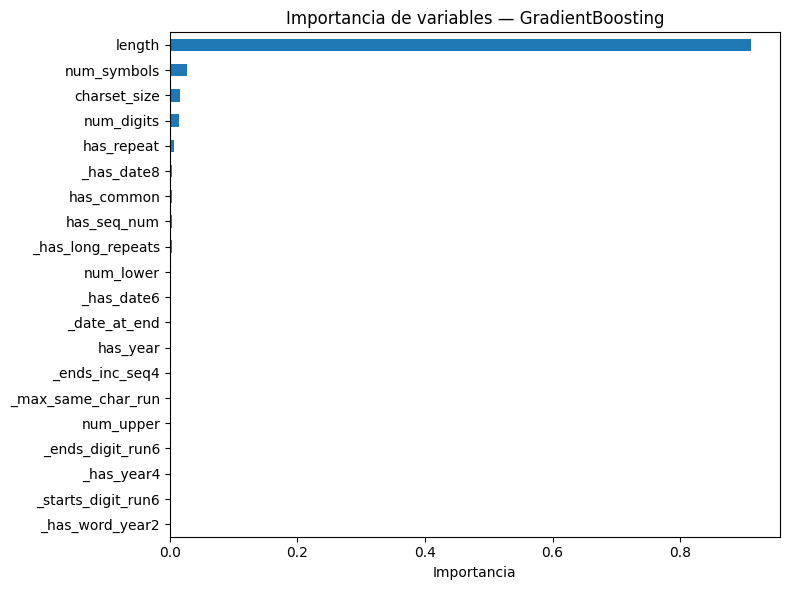

In [49]:
# 4.2 Gradient Boosting — baseline (GBDT)

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,         # profundidad de cada árbol débil
    subsample=0.8,       # stochastic boosting (mejor generalización)
    random_state=42
)

def eval_gbc(name, model, Xtr=X_train, ytr=y_train, Xte=X_test, yte=y_test):
    model.fit(Xtr, ytr)
    y_pred  = model.predict(Xte)
    y_proba = model.predict_proba(Xte)[:,1]
    print(f"\n=== {name} — Test ===")
    print(classification_report(yte, y_pred, digits=4))
    print("F1 (Robusta=1):", round(f1_score(yte, y_pred, pos_label=1), 4))
    print("Balanced Acc.:", round(balanced_accuracy_score(yte, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(yte, y_proba), 4))

    res = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    print(f"CV-ROC_AUC: {res['test_roc_auc'].mean():.4f} ± {res['test_roc_auc'].std():.4f}")
    print(f"CV-F1     : {res['test_f1_weak'].mean():.4f} ± {res['test_f1_weak'].std():.4f}")
    print(f"CV-BalAcc : {res['test_bal_acc'].mean():.4f} ± {res['test_bal_acc'].std():.4f}")

    imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(8,6))
    imp.head(20)[::-1].plot(kind='barh')
    plt.title(f"Importancia de variables — {name}")
    plt.xlabel("Importancia")
    plt.tight_layout()
    plt.show()
    return res, imp

gbc_res, gbc_imp = eval_gbc("GradientBoosting", gbc)


4.1 Evaluacion Sin Columnas dominantes


=== RandomForest (NC) — Test (sin ['charset_size', 'num_symbols', 'num_upper', 'length']) ===
              precision    recall  f1-score   support

           0     0.8179    0.9660    0.8858    144648
           1     0.9787    0.8790    0.9261    256981

    accuracy                         0.9103    401629
   macro avg     0.8983    0.9225    0.9060    401629
weighted avg     0.9208    0.9103    0.9116    401629

F1 (Robusta=1): 0.9261
Balanced Acc.: 0.9225
ROC-AUC: 0.9752
CV-ROC_AUC: 0.9754 ± 0.0001
CV-F1     : 0.9251 ± 0.0004
CV-BalAcc : 0.9217 ± 0.0004


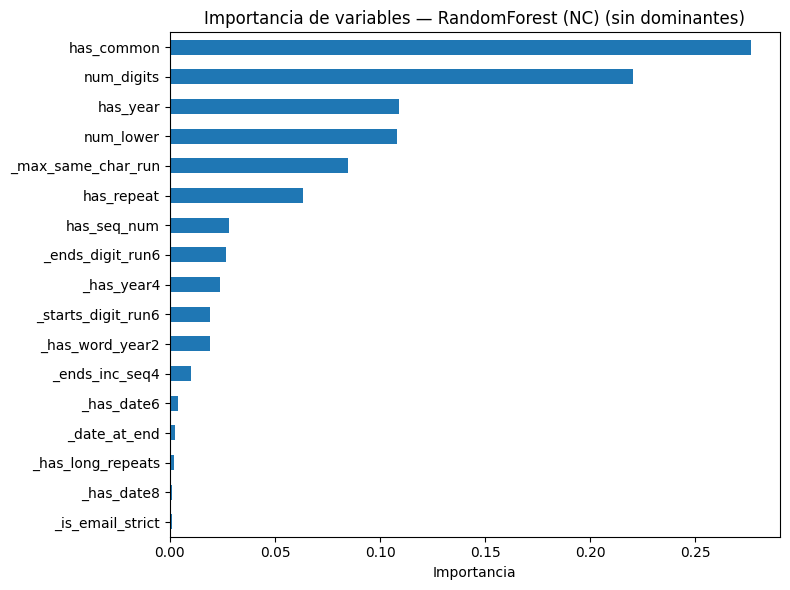


=== GradientBoosting (NC) — Test (sin ['charset_size', 'num_symbols', 'num_upper', 'length']) ===
              precision    recall  f1-score   support

           0     0.8665    0.9210    0.8929    144648
           1     0.9539    0.9201    0.9367    256981

    accuracy                         0.9205    401629
   macro avg     0.9102    0.9206    0.9148    401629
weighted avg     0.9224    0.9205    0.9209    401629

F1 (Robusta=1): 0.9367
Balanced Acc.: 0.9206
ROC-AUC: 0.9746
CV-ROC_AUC: 0.9747 ± 0.0002
CV-F1     : 0.9368 ± 0.0002
CV-BalAcc : 0.9211 ± 0.0003


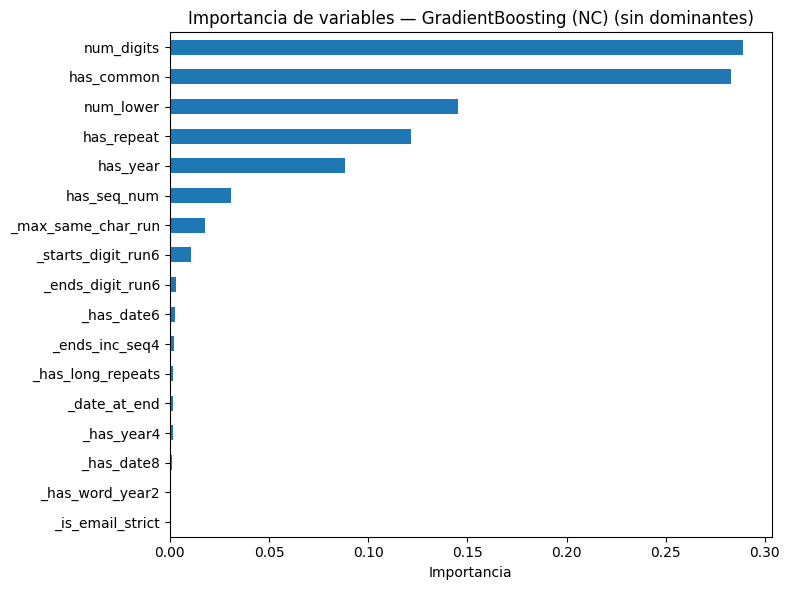

In [51]:
drop_cols = ['charset_size','num_symbols','num_upper','length']  
X_nc = X.drop(columns=drop_cols)
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(
    X_nc, y, test_size=0.2, stratify=y, random_state=42
)

rf_nc = RandomForestClassifier(
    n_estimators=250, max_depth=10, min_samples_leaf=40,
    max_features='sqrt', class_weight='balanced', n_jobs=-1, random_state=42
)
gbc_nc = GradientBoostingClassifier(
    n_estimators=250, learning_rate=0.08, max_depth=3, subsample=0.8, random_state=42
)

def eval_model_nc(name, model):
    model.fit(X_train_nc, y_train_nc)
    y_pred  = model.predict(X_test_nc)
    y_proba = model.predict_proba(X_test_nc)[:,1]
    print(f"\n=== {name} — Test (sin {drop_cols}) ===")
    print(classification_report(y_test_nc, y_pred, digits=4))
    print("F1 (Robusta=1):", round(f1_score(y_test_nc, y_pred, pos_label=1), 4))
    print("Balanced Acc.:", round(balanced_accuracy_score(y_test_nc, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(y_test_nc, y_proba), 4))

    res = cross_validate(model, X_nc, y, cv=cv, scoring=scoring, n_jobs=-1)
    print(f"CV-ROC_AUC: {res['test_roc_auc'].mean():.4f} ± {res['test_roc_auc'].std():.4f}")
    print(f"CV-F1     : {res['test_f1_weak'].mean():.4f} ± {res['test_f1_weak'].std():.4f}")
    print(f"CV-BalAcc : {res['test_bal_acc'].mean():.4f} ± {res['test_bal_acc'].std():.4f}")

    imp = pd.Series(model.feature_importances_, index=X_nc.columns).sort_values(ascending=False)
    plt.figure(figsize=(8,6))
    imp.head(20)[::-1].plot(kind='barh')
    plt.title(f"Importancia de variables — {name} (sin dominantes)")
    plt.xlabel("Importancia")
    plt.tight_layout()
    plt.show()
    return res, imp

rf_nc_res, rf_nc_imp   = eval_model_nc("RandomForest (NC)", rf_nc)
gbc_nc_res, gbc_nc_imp = eval_model_nc("GradientBoosting (NC)", gbc_nc)


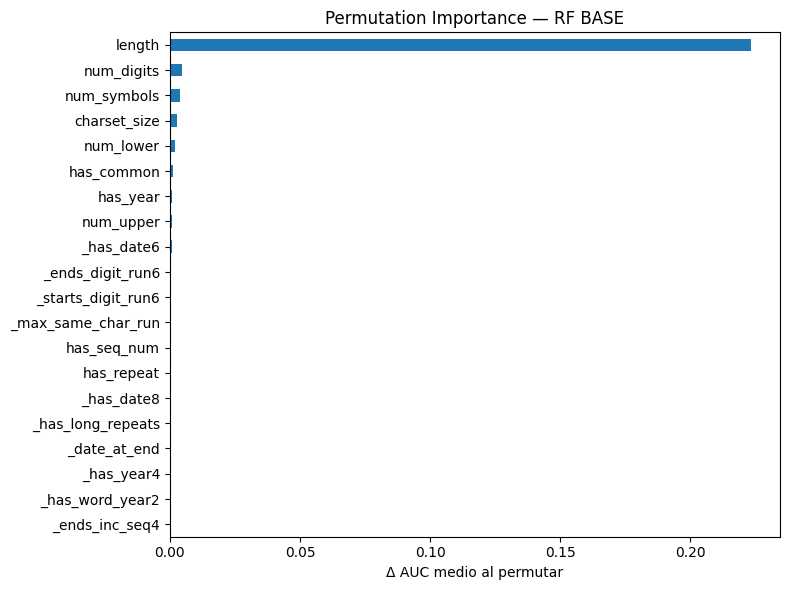

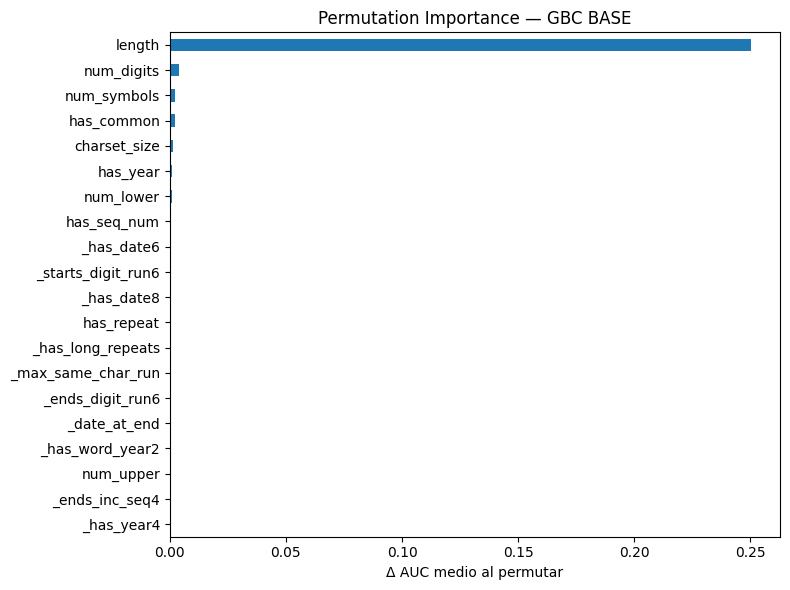

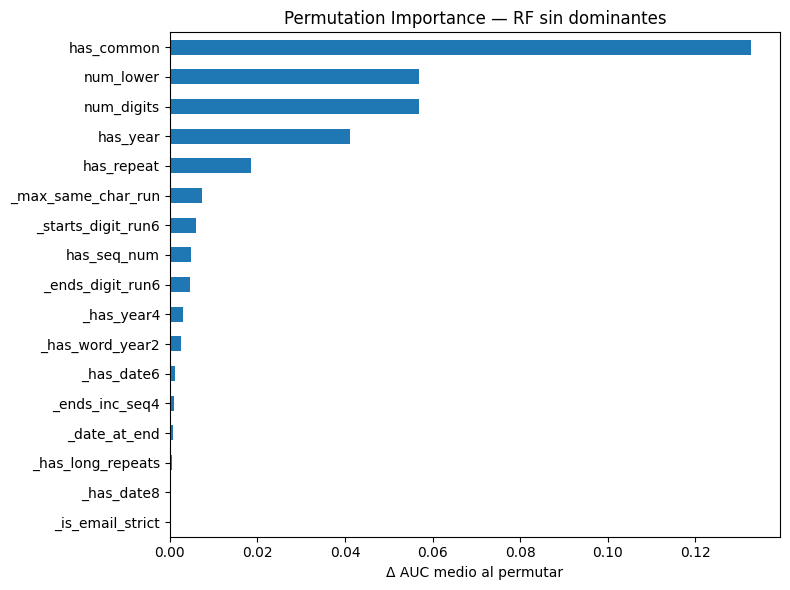

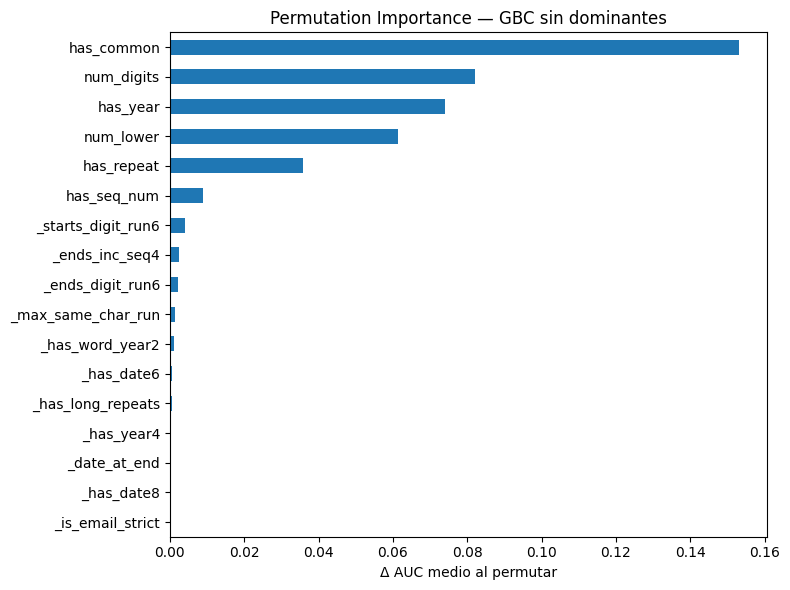

In [39]:
from sklearn.inspection import permutation_importance
import numpy as np

def perm_importance_plot(model, Xte, yte, title):
    r = permutation_importance(model, Xte, yte, n_repeats=5, random_state=42, n_jobs=-1, scoring='roc_auc')
    imp = pd.Series(r.importances_mean, index=Xte.columns).sort_values(ascending=False)
    plt.figure(figsize=(8,6))
    imp.head(20)[::-1].plot(kind='barh')
    plt.title(f"Permutation Importance — {title}")
    plt.xlabel("Δ AUC medio al permutar")
    plt.tight_layout(); plt.show()
    return imp

# Ejemplo con RF baseline
_ = perm_importance_plot(rf_base, X_test, y_test, "RF BASE")
# Ejemplo con GBC baseline
_ = perm_importance_plot(gbc, X_test, y_test, "GBC BASE")
# Ejemplo con RF sin charset/nums/upper/length
_ = perm_importance_plot(rf_nc, X_test_nc, y_test_nc, "RF sin dominantes")
# ejemplo con GBC sin charset/nums/upper/length
_ = perm_importance_plot(gbc_nc, X_test_nc, y_test_nc, "GBC sin dominantes")



4.2 XGBOOST Y LIGHTGBM


=== XGBoost GPU — Test (early stopping) ===
              precision    recall  f1-score   support

           0     0.9261    0.9234    0.9247    144648
           1     0.9569    0.9585    0.9577    256981

    accuracy                         0.9459    401629
   macro avg     0.9415    0.9410    0.9412    401629
weighted avg     0.9458    0.9459    0.9459    401629

F1 (Robusta=1): 0.9577
Balanced Acc.: 0.941
ROC-AUC: 0.9918
CV-ROC_AUC: 0.9918 ± 0.0000
CV-F1     : 0.9579 ± 0.0001
CV-BalAcc : 0.9415 ± 0.0003
Features con gain: 21  Ejemplo de clave: charset_size


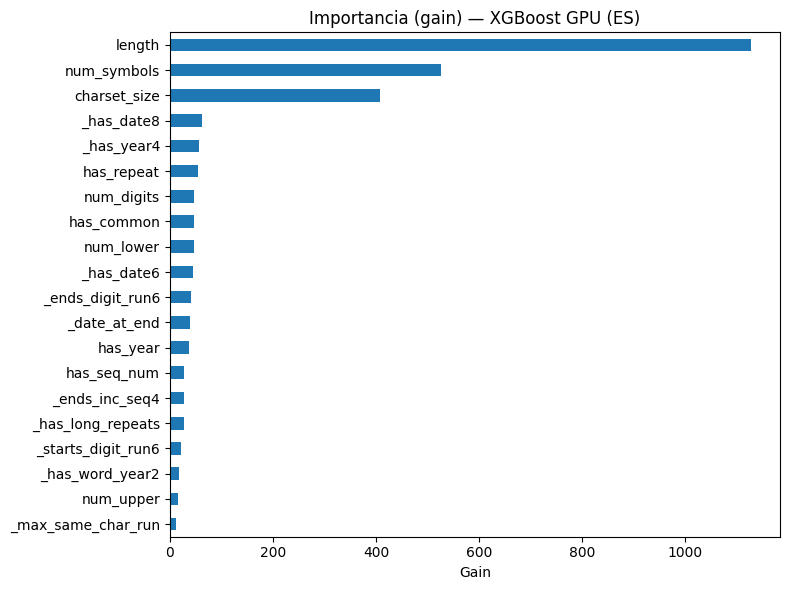

In [53]:
#  XGBoost 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, balanced_accuracy_score, roc_auc_score

# 1) Datos en float32
X_tr_full = X_train.astype(np.float32)
X_te_full = X_test.astype(np.float32)

# 2) Split de validación 
X_tr, X_val, y_tr, y_val = train_test_split(
    X_tr_full, y_train, test_size=0.1, stratify=y_train, random_state=42
)

# 3) DMatrix con NOMBRES de columnas
feat_names = X.columns.tolist()
dtrain = xgb.DMatrix(X_tr,  label=y_tr, feature_names=feat_names)
dvalid = xgb.DMatrix(X_val, label=y_val, feature_names=feat_names)
dtest  = xgb.DMatrix(X_te_full,         feature_names=feat_names)

# 4) Parámetros
params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "eta": 0.08,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.7,
    "lambda": 1.0,     # L2
    "alpha": 0.0,      # L1
    "tree_method": "hist",
    "device": "cuda",  
    "random_state": 42,
}

# 5) Entrenamiento con early stopping
evals = [(dtrain, "train"), (dvalid, "valid")]
booster = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=False
)

# 6) Evaluación en test
proba = booster.predict(dtest, iteration_range=(0, booster.best_iteration + 1))
pred  = (proba >= 0.5).astype(int)
print("\n=== XGBoost GPU — Test (early stopping) ===")
print(classification_report(y_test, pred, digits=4))
print("F1 (Robusta=1):", round(f1_score(y_test, pred, pos_label=1), 4))
print("Balanced Acc.:", round(balanced_accuracy_score(y_test, pred), 4))
print("ROC-AUC:", round(roc_auc_score(y_test, proba), 4))

# 7) Cross-Validation (5-fold) con la API nativa xgb.train
def xgb_cv_scores(X_df, y_series, params, num_boost_round=1000, es_rounds=50, n_splits=5, seed=42):
    """CV 5-fold para XGBoost (API nativa). Reporta ROC-AUC, F1 y Balanced Accuracy."""
    X_np = X_df.astype(np.float32).values
    y_np = np.asarray(y_series)
    feat_names_local = X_df.columns.tolist()

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    aucs, f1s, bals = [], [], []

    for tr_idx, va_idx in skf.split(X_np, y_np):
        dtr = xgb.DMatrix(X_np[tr_idx], label=y_np[tr_idx], feature_names=feat_names_local)
        dva = xgb.DMatrix(X_np[va_idx], label=y_np[va_idx], feature_names=feat_names_local)

        booster_cv = xgb.train(
            params=params,
            dtrain=dtr,
            num_boost_round=num_boost_round,
            evals=[(dtr, "train"), (dva, "valid")],
            early_stopping_rounds=es_rounds,
            verbose_eval=False
        )

        p = booster_cv.predict(dva, iteration_range=(0, booster_cv.best_iteration + 1))
        yhat = (p >= 0.5).astype(int)

        aucs.append(roc_auc_score(y_np[va_idx], p))
        f1s.append(f1_score(y_np[va_idx], yhat, pos_label=1))
        bals.append(balanced_accuracy_score(y_np[va_idx], yhat))

    return (np.mean(aucs), np.std(aucs)), (np.mean(f1s), np.std(f1s)), (np.mean(bals), np.std(bals))

# Ejecutar CV con TODO el dataset X,y (mismas features/params que el entrenamiento)
(cv_auc, cv_auc_std), (cv_f1, cv_f1_std), (cv_bal, cv_bal_std) = xgb_cv_scores(
    X_df=X, y_series=y, params=params, num_boost_round=1000, es_rounds=50, n_splits=5, seed=42
)
print(f"CV-ROC_AUC: {cv_auc:.4f} ± {cv_auc_std:.4f}")
print(f"CV-F1     : {cv_f1:.4f} ± {cv_f1_std:.4f}")
print(f"CV-BalAcc : {cv_bal:.4f} ± {cv_bal_std:.4f}")

# 8) Importancias 
gain_dict = booster.get_score(importance_type='gain')   # claves = nombres de columnas
#chequeo rápido:
print("Features con gain:", len(gain_dict), " Ejemplo de clave:", next(iter(gain_dict.keys()), None))

imp_xgb_named = pd.Series(gain_dict, dtype=float).reindex(feat_names, fill_value=0.0)

plt.figure(figsize=(8,6))
imp_xgb_named.sort_values().tail(20).plot(kind='barh')
plt.title("Importancia (gain) — XGBoost GPU (ES)")
plt.xlabel("Gain")
plt.tight_layout(); plt.show()





=== XGBoost GPU — Test (sin columnas dominantes) ===
              precision    recall  f1-score   support

           0     0.8904    0.9096    0.8999    144648
           1     0.9485    0.9370    0.9427    256981

    accuracy                         0.9271    401629
   macro avg     0.9194    0.9233    0.9213    401629
weighted avg     0.9276    0.9271    0.9273    401629

F1 (Robusta=1): 0.9427
Balanced Acc.: 0.9233
ROC-AUC: 0.9803
CV-ROC_AUC: 0.9803 ± 0.0001
CV-F1     : 0.9427 ± 0.0003
CV-BalAcc : 0.9236 ± 0.0007


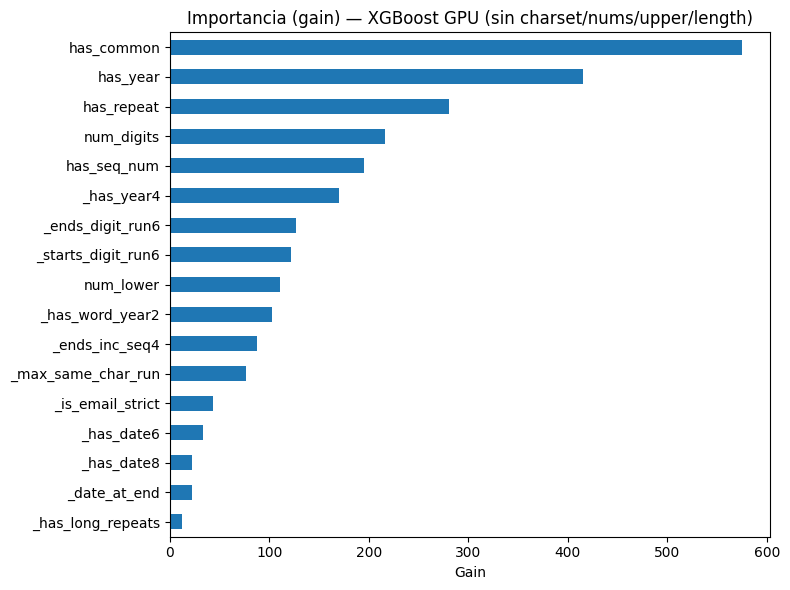

In [52]:
# === XGBoost  SIN columnas dominantes ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, balanced_accuracy_score, roc_auc_score

# 1) Quitar columnas
drop_cols = ['charset_size', 'num_symbols', 'num_upper', 'length']
X_nc = X.drop(columns=drop_cols).astype(np.float32)

# 2) Split train/test ya lo tienes (y_train, y_test); creamos val desde el train
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(
    X_nc, y, test_size=0.2, stratify=y, random_state=42
)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_nc, y_train_nc, test_size=0.1, stratify=y_train_nc, random_state=42
)

# 3) DMatrix con NOMBRES de columnas
feat_names_nc = X_nc.columns.tolist()
dtrain = xgb.DMatrix(X_tr,  label=y_tr,  feature_names=feat_names_nc)
dvalid = xgb.DMatrix(X_val, label=y_val, feature_names=feat_names_nc)
dtest  = xgb.DMatrix(X_test_nc.astype(np.float32), feature_names=feat_names_nc)

# 4) Parámetros GPU (XGBoost 2.x)
params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "eta": 0.08,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.7,
    "lambda": 1.0,   # L2
    "alpha": 0.0,    # L1
    "tree_method": "hist",
    "device": "cuda",   
    "random_state": 42,
}

# 5) Entrenamiento con early stopping
evals = [(dtrain, "train"), (dvalid, "valid")]
booster_nc = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=False
)

# 6) Evaluación en TEST
proba_nc = booster_nc.predict(dtest, iteration_range=(0, booster_nc.best_iteration + 1))
pred_nc  = (proba_nc >= 0.5).astype(int)
print("\n=== XGBoost GPU — Test (sin columnas dominantes) ===")
print(classification_report(y_test_nc, pred_nc, digits=4))
print("F1 (Robusta=1):", round(f1_score(y_test_nc, pred_nc, pos_label=1), 4))
print("Balanced Acc.:", round(balanced_accuracy_score(y_test_nc, pred_nc), 4))
print("ROC-AUC:", round(roc_auc_score(y_test_nc, proba_nc), 4))

# 7) Cross-Validation (5-fold) con la API nativa xgb.train
def xgb_cv_scores_nc(X_df, y_series, params, num_boost_round=1000, es_rounds=50, n_splits=5, seed=42):
    X_np = X_df.astype(np.float32).values
    y_np = np.asarray(y_series)
    feat_names = X_df.columns.tolist()

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    aucs, f1s, bals = [], [], []

    for tr_idx, va_idx in skf.split(X_np, y_np):
        dtr = xgb.DMatrix(X_np[tr_idx], label=y_np[tr_idx], feature_names=feat_names)
        dva = xgb.DMatrix(X_np[va_idx], label=y_np[va_idx], feature_names=feat_names)

        booster_cv = xgb.train(
            params=params,
            dtrain=dtr,
            num_boost_round=num_boost_round,
            evals=[(dtr, "train"), (dva, "valid")],
            early_stopping_rounds=es_rounds,
            verbose_eval=False
        )
        p = booster_cv.predict(dva, iteration_range=(0, booster_cv.best_iteration + 1))
        yhat = (p >= 0.5).astype(int)

        aucs.append(roc_auc_score(y_np[va_idx], p))
        f1s.append(f1_score(y_np[va_idx], yhat, pos_label=1))
        bals.append(balanced_accuracy_score(y_np[va_idx], yhat))

    return (np.mean(aucs), np.std(aucs)), (np.mean(f1s), np.std(f1s)), (np.mean(bals), np.std(bals))

(cv_auc, cv_auc_std), (cv_f1, cv_f1_std), (cv_bal, cv_bal_std) = xgb_cv_scores_nc(
    X_df=X_nc, y_series=y, params=params, num_boost_round=1000, es_rounds=50, n_splits=5, seed=42
)
print(f"CV-ROC_AUC: {cv_auc:.4f} ± {cv_auc_std:.4f}")
print(f"CV-F1     : {cv_f1:.4f} ± {cv_f1_std:.4f}")
print(f"CV-BalAcc : {cv_bal:.4f} ± {cv_bal_std:.4f}")


# 7) Importancias 
gain_nc = booster_nc.get_score(importance_type='gain')  # claves = nombres de columnas
imp_nc = pd.Series(gain_nc, dtype=float).reindex(feat_names_nc, fill_value=0.0)

plt.figure(figsize=(8,6))
imp_nc.sort_values().tail(20).plot(kind='barh')
plt.title("Importancia (gain) — XGBoost GPU (sin charset/nums/upper/length)")
plt.xlabel("Gain")
plt.tight_layout(); plt.show()


[LightGBM] [Info] Number of positive: 925130, number of negative: 520734
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 1445864, number of used features: 21
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3080 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 7 dense feature groups (11.03 MB) transferred to GPU in 0.011803 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.639846 -> initscore=0.574695
[LightGBM] [Info] Start training from score 0.574695
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[868]	valid_0's auc: 0.99183	valid_0's binary_logloss: 0.107135

=== LightGBM GPU — Test ===
              precision    recall  f1-score   support

           0 

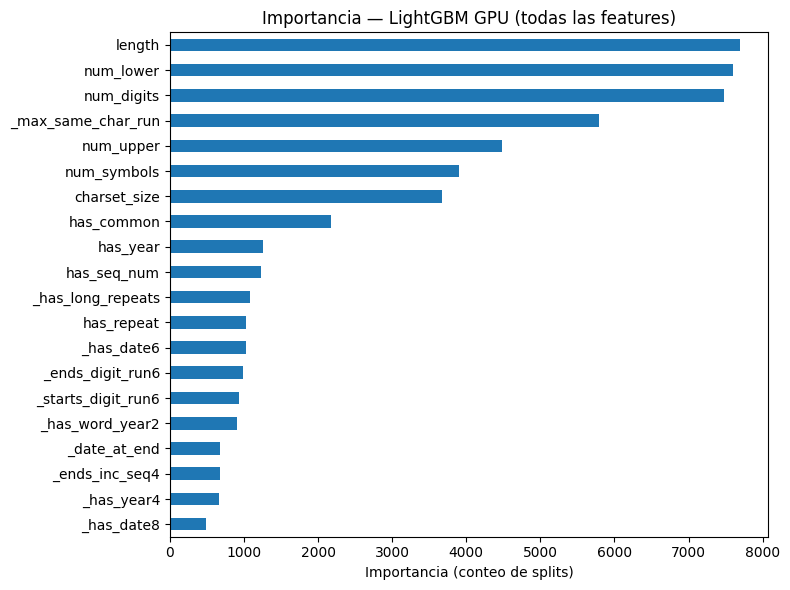

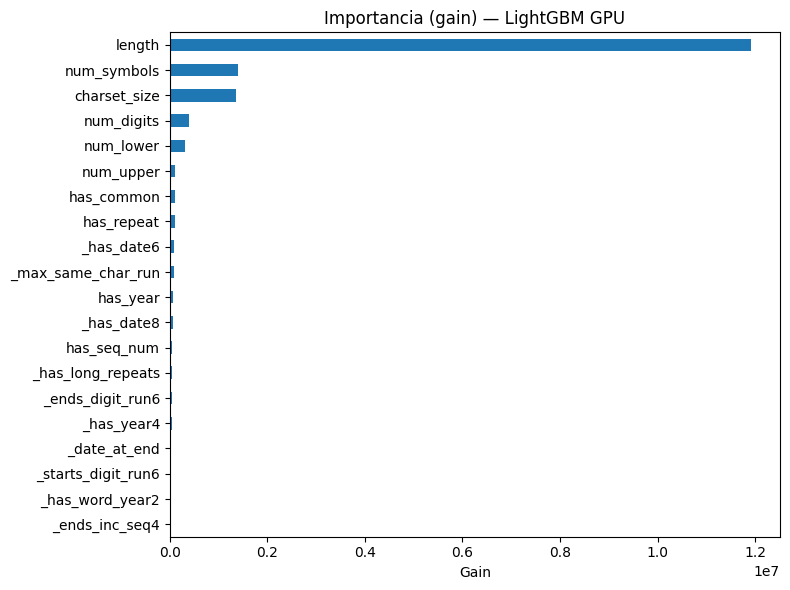

In [42]:
# LightGBM 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import (classification_report, f1_score,
                             balanced_accuracy_score, roc_auc_score)

# 1) Asegura float32 (menos RAM y +rápido)
X_train_lgb = X_train.astype(np.float32)
X_test_lgb  = X_test.astype(np.float32)
X_all_lgb   = X.astype(np.float32)

# 2) Split de validación para early stopping (desde el TRAIN)
X_tr_l, X_val_l, y_tr_l, y_val_l = train_test_split(
    X_train_lgb, y_train, test_size=0.10, stratify=y_train, random_state=42
)

# 3) Modelo LightGBM con GPU
lgb_gpu = LGBMClassifier(
    n_estimators=2000,        # con early stopping, LGBM parará antes si no mejora
    learning_rate=0.05,
    num_leaves=63,            # ~2^(max_depth) (controla complejidad)
    max_depth=-1,             # sin límite explícito (num_leaves manda)
    subsample=0.8,            # stochastic boosting
    colsample_bytree=0.8,
    reg_lambda=1.0,           # L2
    reg_alpha=0.0,            # L1
    device='gpu',             
    random_state=42
)

# 4) Entrenamiento con early stopping (no logea cada iteración)
lgb_gpu.fit(
    X_tr_l, y_tr_l,
    eval_set=[(X_val_l, y_val_l)],
    eval_metric='auc',
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=0)]
)

# 5) Evaluación en TEST
y_pred  = lgb_gpu.predict(X_test_lgb)
y_proba = lgb_gpu.predict_proba(X_test_lgb)[:, 1]
print("\n=== LightGBM GPU — Test ===")
print(classification_report(y_test, y_pred, digits=4))
print("F1 (Robusta=1):", round(f1_score(y_test, y_pred, pos_label=1), 4))
print("Balanced Acc.:", round(balanced_accuracy_score(y_test, y_pred), 4))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 4))

# 6) Validación cruzada (5-fold) con TODO el dataset (GPU)
scoring = {'roc_auc':'roc_auc', 'f1_weak':make_scorer(f1_score, pos_label=1), 'bal_acc':'balanced_accuracy'}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

res_lgb = cross_validate(
    lgb_gpu, X_all_lgb, y,
    cv=cv, scoring=scoring, n_jobs=-1
)
print(f"CV-ROC_AUC: {res_lgb['test_roc_auc'].mean():.4f} ± {res_lgb['test_roc_auc'].std():.4f}")
print(f"CV-F1     : {res_lgb['test_f1_weak'].mean():.4f} ± {res_lgb['test_f1_weak'].std():.4f}")
print(f"CV-BalAcc : {res_lgb['test_bal_acc'].mean():.4f} ± {res_lgb['test_bal_acc'].std():.4f}")

# 7) Importancia de variables (split / gain; por defecto 'split')
imp_lgb = pd.Series(lgb_gpu.feature_importances_, index=X.columns, dtype=float)
plt.figure(figsize=(8,6))
imp_lgb.sort_values().tail(20).plot(kind='barh')
plt.title("Importancia — LightGBM GPU (todas las features)")
plt.xlabel("Importancia (conteo de splits)")
plt.tight_layout(); plt.show()

# Importancia 
booster = lgb_gpu.booster_
imp_gain = booster.feature_importance(importance_type='gain')
imp_gain_s = pd.Series(imp_gain, index=X.columns, dtype=float)
plt.figure(figsize=(8,6))
imp_gain_s.sort_values().tail(20).plot(kind='barh')
plt.title("Importancia (gain) — LightGBM GPU")
plt.xlabel("Gain")
plt.tight_layout(); plt.show()


[LightGBM] [Info] Number of positive: 925130, number of negative: 520734
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 1445864, number of used features: 17
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3080 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3 dense feature groups (5.52 MB) transferred to GPU in 0.006050 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.639846 -> initscore=0.574695
[LightGBM] [Info] Start training from score 0.574695
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[875]	valid_0's auc: 0.980195	valid_0's binary_logloss: 0.170388

=== LightGBM GPU — Test (sin columnas dominantes) ===
              precision    recall  f1-scor

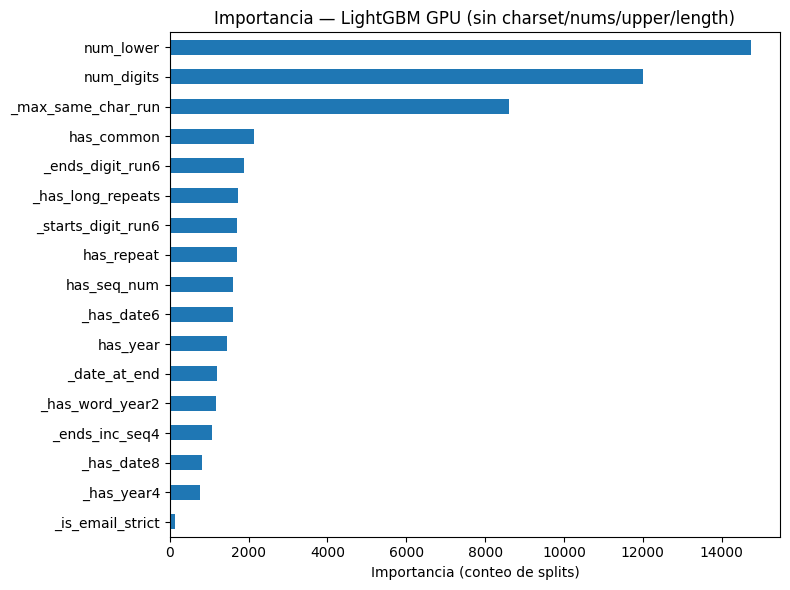

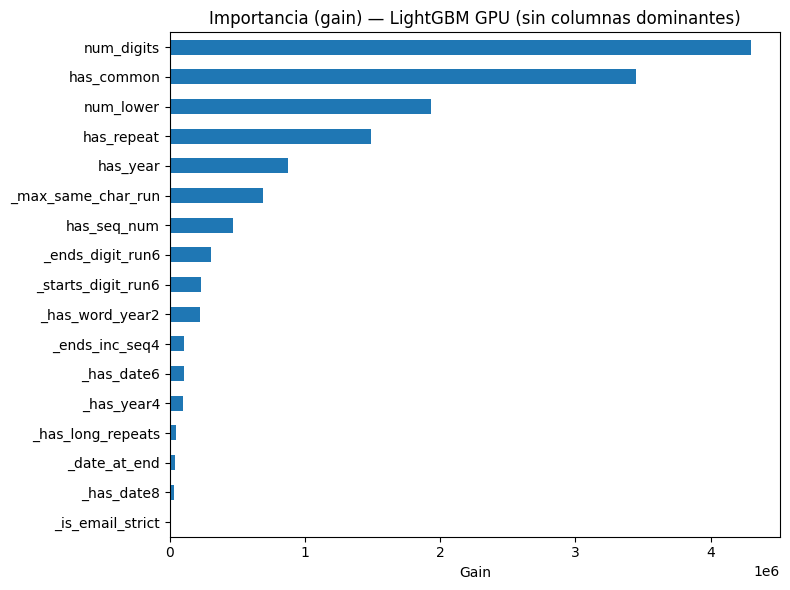

In [43]:

# LightGBM — SIN columnas dominantes


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import (classification_report, f1_score,
                             balanced_accuracy_score, roc_auc_score)

# 1) Quitar columnas dominantes y asegurar float32
drop_cols = ['charset_size', 'num_symbols', 'num_upper', 'length']
X_nc = X.drop(columns=drop_cols).astype(np.float32)

# 2) Train/Test y split de validación para early stopping
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(
    X_nc, y, test_size=0.2, stratify=y, random_state=42
)
X_tr_l, X_val_l, y_tr_l, y_val_l = train_test_split(
    X_train_nc, y_train_nc, test_size=0.10, stratify=y_train_nc, random_state=42
)

# 3) Modelo LightGBM con GPU
lgb_gpu_nc = LGBMClassifier(
    n_estimators=2000,
    learning_rate=0.05,
    num_leaves=63,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    reg_alpha=0.0,
    device='gpu',            # <<=== GPU
    random_state=42
)

# 4) Entrenamiento con early stopping
lgb_gpu_nc.fit(
    X_tr_l, y_tr_l,
    eval_set=[(X_val_l, y_val_l)],
    eval_metric='auc',
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=0)]
)

# 5) Evaluación en TEST
y_pred_nc  = lgb_gpu_nc.predict(X_test_nc)
y_proba_nc = lgb_gpu_nc.predict_proba(X_test_nc)[:, 1]
print("\n=== LightGBM GPU — Test (sin columnas dominantes) ===")
print(classification_report(y_test_nc, y_pred_nc, digits=4))
print("F1 (robusta=1):", round(f1_score(y_test_nc, y_pred_nc, pos_label=1), 4))
print("Balanced Acc.:", round(balanced_accuracy_score(y_test_nc, y_pred_nc), 4))
print("ROC-AUC:", round(roc_auc_score(y_test_nc, y_proba_nc), 4))

# 6) Validación cruzada (5-fold) con todo el dataset sin columnas dominantes
res_lgb_nc = cross_validate(
    lgb_gpu_nc, X_nc, y,
    cv=cv, scoring=scoring, n_jobs=-1
)
print(f"CV-ROC_AUC: {res_lgb_nc['test_roc_auc'].mean():.4f} ± {res_lgb_nc['test_roc_auc'].std():.4f}")
print(f"CV-F1     : {res_lgb_nc['test_f1_weak'].mean():.4f} ± {res_lgb_nc['test_f1_weak'].std():.4f}")
print(f"CV-BalAcc : {res_lgb_nc['test_bal_acc'].mean():.4f} ± {res_lgb_nc['test_bal_acc'].std():.4f}")

# 7) Importancia (split) y gain
imp_split_nc = pd.Series(lgb_gpu_nc.feature_importances_, index=X_nc.columns, dtype=float)
plt.figure(figsize=(8,6))
imp_split_nc.sort_values().tail(20).plot(kind='barh')
plt.title("Importancia — LightGBM GPU (sin charset/nums/upper/length)")
plt.xlabel("Importancia (conteo de splits)")
plt.tight_layout(); plt.show()

#Gain (más informativa)
booster_nc = lgb_gpu_nc.booster_
imp_gain_nc = pd.Series(
    booster_nc.feature_importance(importance_type='gain'),
    index=X_nc.columns, dtype=float
)
plt.figure(figsize=(8,6))
imp_gain_nc.sort_values().tail(20).plot(kind='barh')
plt.title("Importancia (gain) — LightGBM GPU (sin columnas dominantes)")
plt.xlabel("Gain")
plt.tight_layout(); plt.show()


5. Exportacion 

In [45]:
import joblib
from pathlib import Path

# Carpeta de salida
EXPORT_PATH = Path("../models")
EXPORT_PATH.mkdir(exist_ok=True, parents=True)

# Guardar modelos sklearn
joblib.dump(logreg_L1, EXPORT_PATH / "logreg_L1.pkl")
joblib.dump(logreg_L2, EXPORT_PATH / "logreg_L2.pkl")
joblib.dump(tree_base, EXPORT_PATH / "decision_tree_base.pkl")
joblib.dump(tree_reg, EXPORT_PATH / "decision_tree_regularized.pkl")
#tree_no_charset
joblib.dump(tree_no_charset, EXPORT_PATH / "decision_tree_no_main_characteristic.pkl")
#logreg_L2_nc
joblib.dump(logreg_L2_nc, EXPORT_PATH / "logreg_L2_no_main_characteristic.pkl")
#logreg_L1_nc
joblib.dump(logreg_L1_nc, EXPORT_PATH / "logreg_L1_no_main_characteristic.pkl")
#rf_base
joblib.dump(rf_base, EXPORT_PATH / "random_forest.pkl")
#rf_strict
joblib.dump(rf_strict, EXPORT_PATH / "random_forest_strict.pkl")
#rf_nc
joblib.dump(rf_nc, EXPORT_PATH / "random_forest_strict_no_main_characteristics.pkl")
#gbc
joblib.dump(gbc, EXPORT_PATH / "gradient_boosting.pkl")
#gbc_nc
joblib.dump(gbc_nc, EXPORT_PATH / "gradient_boosting_no_main_characteristic.pkl")

print("Modelos sklearn guardados en:", EXPORT_PATH.resolve())


Modelos sklearn guardados en: D:\Universidad\ULTIMO_SEMESTRE\Tesis\Proyecto_PasswordStrength - copia\models


In [46]:
import xgboost as xgb
import joblib
from pathlib import Path

#carpeta de exportación

EXPORT_PATH = Path("../models")
EXPORT_PATH.mkdir(parents=True, exist_ok=True)

#Exportar Booster completo (nativo)
#Modelo con todas las features ---
booster.save_model(EXPORT_PATH / "xgboost_gpu_all.json")   # formato JSON compatible con XGBoost 2.x
booster.save_model(EXPORT_PATH / "xgboost_gpu_all.ubj")    # binario rápido (Ultra Binary JSON)

#Modelo sin columnas dominantes 
booster_nc.save_model(EXPORT_PATH / "xgboost_gpu_nc.json")
booster_nc.save_model(EXPORT_PATH / "xgboost_gpu_nc.ubj")

print("Boosters XGBoost exportados correctamente (all & nc)")}






Boosters XGBoost exportados correctamente (all & nc)


In [48]:

import lightgbm as lgb
import joblib
from pathlib import Path


EXPORT_PATH = Path("../models")
EXPORT_PATH.mkdir(parents=True, exist_ok=True)

#Exportar modelo principal — lgb_gpu (TODAS LAS FEATURES)
try:
    # Guardar el booster nativo (formato .txt, compatible con la API LightGBM)
    booster_all = lgb_gpu.booster_
    booster_all.save_model(EXPORT_PATH / "lightgbm_gpu_all.txt")

    # Guardar el modelo completo (wrapper sklearn con toda la metadata)
    joblib.dump(lgb_gpu, EXPORT_PATH / "lightgbm_gpu_all.pkl")

    print("LightGBM GPU (completo) exportado correctamente.")
except Exception as e:
    print("No se pudo exportar lgb_gpu:", e)

#Exportar modelo — lgb_gpu_nc (SIN columnas dominantes)

try:
    booster_nc = lgb_gpu_nc.booster_
    booster_nc.save_model(EXPORT_PATH / "lightgbm_gpu_nc.txt")

    joblib.dump(lgb_gpu_nc, EXPORT_PATH / "lightgbm_gpu_nc.pkl")

    print("LightGBM GPU (sin columnas dominantes) exportado correctamente.")
except Exception as e:
    print("No se pudo exportar lgb_gpu_nc:", e)

#Confirmar ruta final y archivos

print("\n Modelos LightGBM guardados en:")
for file in EXPORT_PATH.glob("lightgbm_gpu_*.pkl"):
    print("  •", file.name)
for file in EXPORT_PATH.glob("lightgbm_gpu_*.txt"):
    print("  •", file.name)


LightGBM GPU (completo) exportado correctamente.
LightGBM GPU (sin columnas dominantes) exportado correctamente.

 Modelos LightGBM guardados en:
  • lightgbm_gpu_all.pkl
  • lightgbm_gpu_nc.pkl
  • lightgbm_gpu_all.txt
  • lightgbm_gpu_nc.txt
